## Handling Structural Errors

Structural errors are those that arise during measurement, data transfer, or other types of "poor housekeeping.", such as: 
  - Data Type Conversion
  - Syntax Errors (Remove white spaces)
  - Fix Typos

 - Selection Bias Example:

Imagine you're conducting a study on the health effects of a new drug. Instead of randomly selecting participants, you recruit only people who are already in good health. This introduces selection bias because your sample does not represent the broader population, making it difficult to generalize your findings to people with different health conditions.

 - Nonresponse Bias Example:

You conduct a customer satisfaction survey for an online shopping website. However, only customers who had extremely positive or negative experiences respond to the survey. Those with moderate experiences do not participate. This nonresponse bias can lead to an overemphasis on extreme opinions and may not accurately reflect the overall satisfaction of all customers.

 - Measurement Bias Example:

You're measuring the height of individuals using a tape measure, but the tape measure has a consistent error, always recording heights as 2 inches taller than they actually are. This measurement bias introduces a systematic error in your data, causing all height measurements to be consistently inaccurate.

 - Sampling Bias Example:

Suppose you're studying the voting preferences of a population, but you only collect data from a specific urban area. This sampling bias can lead to a skewed understanding of the population's voting behavior because you've neglected to include data from rural or suburban areas.

 - Instrumentation Bias Example:

You're using a thermometer to measure the temperature, but the thermometer consistently reads temperatures 5 degrees Fahrenheit too low. This instrumentation bias can result in a systematic underestimation of temperature in all your measurements.

 - Time-Related Bias Example:

You're studying the effects of a new marketing campaign on product sales, but you only collect data during a holiday season when sales are typically high. This time-related bias can lead to the false conclusion that the marketing campaign had a significant impact on sales when, in fact, the increase was due to the holiday season.

 - Publication Bias Example:

Researchers conduct several studies on the effectiveness of a particular medical treatment. However, they only publish the studies that show positive results, while leaving out those that found no significant effect or negative results. This publication bias can create a skewed perception of the treatment's effectiveness in the medical literature.

 - Confounding Variables Example:

You're investigating the relationship between ice cream consumption and the number of drownings at a beach. While it may appear that more ice cream consumption is correlated with more drownings, the confounding variable here is temperature. Hotter weather leads to both increased ice cream consumption and more people swimming, which increases the risk of drownings. Failing to account for temperature as a confounding variable can lead to a false causal relationship.

 - Underreporting or Non-disclosure Example:

In a clinical trial for a new medication, researchers do not disclose all the side effects experienced by participants, especially the severe ones. By selectively reporting only positive or less severe outcomes, the researchers can bias the perception of the medication's safety and efficacy.

Identifying and addressing these structural errors is crucial in research and data analysis to ensure that the findings and conclusions drawn from the data are accurate, reliable, and applicable to the broader population or context. Researchers use various methods and techniques to mitigate these errors, such as random sampling, careful instrument calibration, and transparent reporting of results.

In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import pandas as pd

In [3]:
# Import the dataset
df_titanic = pd.read_csv("https://raw.githubusercontent.com/atulpatelDS/Data_Files/master/Feature_Engineering/Structural_Error/titanic_train.csv")

In [4]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,Third,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,$7.25,NaN,S
1,2,1,First,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,$71.28,C85,C
2,3,1,Third,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,$7.93,NaN,S
3,4,1,First,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,$53.10,C123,S
4,5,0,Third,"Allen, Mr. William Henry",male,35.0,0,0,373450,$8.05,NaN,S


In [5]:
#delete irrelevant data
df_titanic.drop(["Name","Ticket"],inplace=True,axis=1)

In [6]:
df_titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,Third,male,22.0,1,0,$7.25,NaN,S
1,2,1,First,female,38.0,1,0,$71.28,C85,C
2,3,1,Third,female,26.0,0,0,$7.93,NaN,S
3,4,1,First,female,35.0,1,0,$53.10,C123,S
4,5,0,Third,male,35.0,0,0,$8.05,NaN,S


### Data Type Conversion

In [7]:
df_titanic.dtypes

PassengerId      int64
Survived         int64
Pclass          object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Fare            object
Cabin           object
Embarked        object
dtype: object

In [8]:
df_titanic['Fare']

0       $7.25 
1      $71.28 
2       $7.93 
3      $53.10 
4       $8.05 
        ...   
886       $13 
887       $30 
888    $23.45 
889       $30 
890     $7.75 
Name: Fare, Length: 891, dtype: object

We can see that Fare is showing the data type "object". We need to change the data type of this column.

In [9]:
## We will replace the dtype "object" to "float"
df_titanic["Fare"] = df_titanic["Fare"].str.replace("$","").astype(float)

C:\Users\user\AppData\Local\Temp\ipykernel_13148\4150747285.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_titanic["Fare"] = df_titanic["Fare"].str.replace("$","").astype(float)


In [10]:
df_titanic["Fare"]

0       7.25
1      71.28
2       7.93
3      53.10
4       8.05
       ...  
886    13.00
887    30.00
888    23.45
889    30.00
890     7.75
Name: Fare, Length: 891, dtype: float64

In [11]:
df_titanic.dtypes

PassengerId      int64
Survived         int64
Pclass          object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [12]:
## Lets use some calculation on fare column
## Lets calculate the mean value of Fare
df_titanic.Fare.mean(),df_titanic.Fare.median()

(32.205016835016835, 14.45)

### Syntax Errors

#### Remove White Spaces
Extra white spaces at the beginning or the end of a string should be removed.

In [13]:
import pandas as pd
df = pd.DataFrame({
    'company_code': ['Abcd','EFGF ',' fhygy','abcd','',' '],
    'date_of_sale ': ['12/05/2002','16/02/1999','25/09/1998','12/02/2022','15/09/1997','15/09/1999'],
    'sale_amount': [12348.5, 233331.2, 22.5, 2566552.0, 23.0,689.5]})

In [14]:
df

,company_code,date_of_sale,sale_amount
0,Abcd,12/05/2002,12348.5
1,EFGF,16/02/1999,233331.2
2,fhygy,25/09/1998,22.5
3,abcd,12/02/2022,2566552.0
4,,15/09/1997,23.0
5,,15/09/1999,689.5


In [15]:
print("\nIs space is present?")
# Check if the string ends with a white space
df['ends with space'] = list(map(lambda x: x.endswith(" "), df['company_code']))
df


Is space is present?


,company_code,date_of_sale,sale_amount,ends with space
0,Abcd,12/05/2002,12348.5,False
1,EFGF,16/02/1999,233331.2,True
2,fhygy,25/09/1998,22.5,False
3,abcd,12/02/2022,2566552.0,False
4,,15/09/1997,23.0,False
5,,15/09/1999,689.5,True


In [16]:
# Check if the string start with a white space
df['starts with space'] = list(map(lambda x: x.startswith(" "), df['company_code']))
df

,company_code,date_of_sale,sale_amount,ends with space,starts with space
0,Abcd,12/05/2002,12348.5,False,False
1,EFGF,16/02/1999,233331.2,True,False
2,fhygy,25/09/1998,22.5,False,True
3,abcd,12/02/2022,2566552.0,False,False
4,,15/09/1997,23.0,False,False
5,,15/09/1999,689.5,True,True


In [17]:
# strip : Remove spaces at the beginning and at the end of the string:
df['company_code_without_space'] = list(map(lambda x: x.strip(), df['company_code']))
df

,company_code,date_of_sale,sale_amount,ends with space,starts with space,company_code_without_space
0,Abcd,12/05/2002,12348.5,False,False,Abcd
1,EFGF,16/02/1999,233331.2,True,False,EFGF
2,fhygy,25/09/1998,22.5,False,True,fhygy
3,abcd,12/02/2022,2566552.0,False,False,abcd
4,,15/09/1997,23.0,False,False,
5,,15/09/1999,689.5,True,True,


In [18]:
print("before : ",df['company_code'].values)
print("after : ",df['company_code_without_space'].values)

before :  ['Abcd' 'EFGF ' ' fhygy' 'abcd' '' ' ']
after :  ['Abcd' 'EFGF' 'fhygy' 'abcd' '' '']


#### Lets apply on Titanic Dataset

In [19]:
# Check if the string ends with a white space
#df_titanic["Sex_r"] = list(map(lambda x:x.endswith(" "),df_titanic["Sex_New"]))
df_titanic["Sex_ends"] = list(map(lambda x:x.endswith(" "),df_titanic["Sex"]))

In [20]:
df_titanic["Sex_ends"].sum()

7

In [21]:
# Check if the string start with a white space
#df_titanic["Sex_l"] = list(map(lambda x:x.startswith(" "),df_titanic["Sex_New"]))
df_titanic["Sex_starts"] = list(map(lambda x:x.startswith(" "),df_titanic["Sex"]))

In [22]:
df_titanic["Sex_starts"].sum()

19

In [23]:
df_titanic

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Sex_ends,Sex_starts
0,1,0,Third,male,22.0,1,0,7.25,NaN,S,False,True
1,2,1,First,female,38.0,1,0,71.28,C85,C,False,False
2,3,1,Third,female,26.0,0,0,7.93,NaN,S,False,False
3,4,1,First,female,35.0,1,0,53.10,C123,S,False,False
4,5,0,Third,male,35.0,0,0,8.05,NaN,S,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,Second,male,27.0,0,0,13.00,NaN,S,False,False
887,888,1,First,female,19.0,0,0,30.00,B42,S,False,False
888,889,0,Third,female,NaN,1,2,23.45,NaN,S,False,False
889,890,1,First,male,26.0,0,0,30.00,C148,C,False,False


In [24]:
df_titanic.drop(["Sex_ends","Sex_starts"],inplace=True,axis=1)

In [25]:
df_titanic

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,Third,male,22.0,1,0,7.25,NaN,S
1,2,1,First,female,38.0,1,0,71.28,C85,C
2,3,1,Third,female,26.0,0,0,7.93,NaN,S
3,4,1,First,female,35.0,1,0,53.10,C123,S
4,5,0,Third,male,35.0,0,0,8.05,NaN,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,Second,male,27.0,0,0,13.00,NaN,S
887,888,1,First,female,19.0,0,0,30.00,B42,S
888,889,0,Third,female,NaN,1,2,23.45,NaN,S
889,890,1,First,male,26.0,0,0,30.00,C148,C


In [26]:
df_titanic["Sex_New"] = list(map(lambda x: x.strip(), df_titanic['Sex']))

#### Fix typos
When we collect the raw data we can observe that same type of string values are stored in many different ways.
We need to recognize these values in the dataset.
* for example you can find that in the column sex , male is represesnted sometimes by m , M , Ma,.. => u have to use unique expression.
* if it is the case think about using :

df_titanic["Sex_New"] = df_titanic["Sex_New"].map({"fem":"female","mal":"male","male":"male","female":"female"})

In [27]:
df_titanic['Sex_New'].unique()

array(['male', 'female', 'fem', 'mal'], dtype=object)

In [28]:
## Lets check whether each value in the below dataset is male or female.
df_titanic

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Sex_New
0,1,0,Third,male,22.0,1,0,7.25,NaN,S,male
1,2,1,First,female,38.0,1,0,71.28,C85,C,female
2,3,1,Third,female,26.0,0,0,7.93,NaN,S,female
3,4,1,First,female,35.0,1,0,53.10,C123,S,female
4,5,0,Third,male,35.0,0,0,8.05,NaN,S,male
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,Second,male,27.0,0,0,13.00,NaN,S,male
887,888,1,First,female,19.0,0,0,30.00,B42,S,female
888,889,0,Third,female,NaN,1,2,23.45,NaN,S,female
889,890,1,First,male,26.0,0,0,30.00,C148,C,male


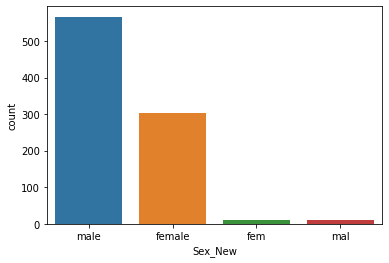

In [29]:
sns.countplot(x = "Sex_New",data = df_titanic)
plt.show()

In [30]:
df_titanic['Sex_New'].value_counts()

male      566
female    303
fem        11
mal        11
Name: Sex_New, dtype: int64

In [32]:
df_titanic["Sex_New"] = df_titanic["Sex_New"].map({"fem":"female","mal":"male","male":"male","female":"female"})

In [33]:
df_titanic['Sex_New'].value_counts()

male      577
female    314
Name: Sex_New, dtype: int64

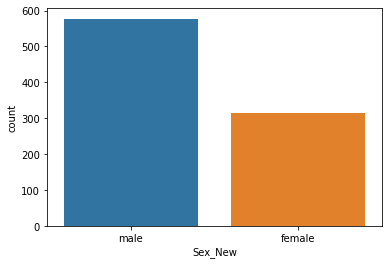

In [34]:
sns.countplot(x = "Sex_New",data = df_titanic)
plt.show()


    END